##### Importing suicide statistics from WHO API

In [1]:
import requests
import json
import pandas as pd
r = requests.get('http://apps.who.int/gho/athena/api/GHO/MH_12/.json?filter=Year:2016')
data = r.json()

##### Converting JSON data to Python List

In [2]:
list_of_data = []
for fact in data['fact']:
    for category in fact['Dim']:
        if category['category'] == 'COUNTRY':
            country_code = category['code']
        elif category['category'] == "SEX":
            sex = category['code']
    suicide_rate = fact['value']['numeric']
    list_of_data.append({'Country Code': country_code, 'Sex': sex, "Suicide Rate": suicide_rate})

country_codes = []
for country in list_of_data:
    country_codes.append(country['Country Code'])

country_codes = set(country_codes)

data_dictionary = []
for country in country_codes:
    data_dictionary.append({'Country Code': country, 'Male Suicide Rate':'', 'Female Suicide Rate':'', 'Combined Suicide Rate':''})

##### creating Python list with dictionary for each country

In [3]:
for data in list_of_data:
    for country in data_dictionary:
        if data['Country Code'] == country['Country Code']:
            if data['Sex'] == 'MLE':
                country['Male Suicide Rate'] = data['Suicide Rate']
            elif data['Sex'] == "FMLE":
                country['Female Suicide Rate'] = data['Suicide Rate']
            elif data['Sex'] == 'BTSX':
                country['Combined Suicide Rate'] = data['Suicide Rate']

###### Converting to Pandas DataFrame

In [4]:
suicide_rates = pd.DataFrame.from_dict(data_dictionary,)
suicide_rates.set_index(['Country Code'], inplace=True)
suicide_rates.sort_index(inplace=True)

In [5]:
suicide_rates[122:155]

,Combined Suicide Rate,Female Suicide Rate,Male Suicide Rate
Country Code,,,
NLD,9.6,6.4,12.9
NOR,10.1,6.5,13.6
NPL,9.6,8.0,11.4
NZL,11.6,6.2,17.3
OMN,3.5,0.9,4.8
PAK,3.1,3.1,3.0
PAN,4.4,1.2,7.6
PER,5.1,2.7,7.6
PHL,3.7,2.3,5.2


In [6]:
r = requests.get('http://apps.who.int/gho/athena/api/GHO/MH_12/.json?filter=Year:2016')
data = r.json()
country_names = []
for country in data['dimension'][4]['code']:
    country_names.append({'Country Code': country['label'], 'Country Name': country['display']})

country_names_df = pd.DataFrame.from_dict(country_names)
country_names_df.set_index('Country Code', inplace=True)

country_names_df.loc[country_names_df.index == "MLT"]

# clean Up Country Names
country_names_df.loc[country_names_df['Country Name'] == "Democratic People's Republic of Korea"] = "North Korea"
country_names_df.loc[country_names_df['Country Name'] == "The former Yugoslav republic of Macedonia"] = "Macedonia"
country_names_df.loc[country_names_df['Country Name'] == "Republic of Moldova"] = "Moldova"
country_names_df.loc[country_names_df['Country Name'] == "Iran (Islamic Republic of)"] = "Iran"
country_names_df.loc[country_names_df['Country Name'] == "Russian Federation"] = "Russia"
country_names_df.loc[country_names_df['Country Name'] == "United Kingdom of Great Britain and Northern Ireland"] = "United Kingdom"
country_names_df.loc[country_names_df['Country Name'] == "Venezuela (Bolivarian Republic of)"] = "Venezuela"
country_names_df.loc[country_names_df['Country Name'] == "United States of America"] = "United States"

country_names_df.tail(15)

suicide_rates = suicide_rates.join(country_names_df)
# suicide_rates

###### Adding country names

In [7]:
suicide_rates = suicide_rates[['Country Name', 'Combined Suicide Rate', 'Male Suicide Rate', 'Female Suicide Rate']]
suicide_rates[95:135]

,Country Name,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate
Country Code,,,,
LBY,Libya,5.5,8.7,2.3
LCA,Saint Lucia,7.3,12.7,2.1
LKA,Sri Lanka,14.2,23.3,6.2
LSO,Lesotho,28.9,22.7,32.6
LTU,Lithuania,25.7,47.5,6.7
LUX,Luxembourg,10.4,15.0,5.8
LVA,Latvia,17.2,31.0,5.1
MAR,Morocco,3.1,2.5,3.6
MDA,Moldova,13.4,24.1,3.8


In [8]:
suicide_rates.shape

(183, 4)

##### importing percentage of population living in cities data from WHO API

In [9]:
r = requests.get('http://apps.who.int/gho/athena/api/GHO/AIR_3/?format=json')
data = r.json()

###### Converting JSON data to Python list

In [10]:
data_dictionary = []
for country in data['fact']:
    for category in country['Dim']:
        if category['category'] == "COUNTRY":
            countrycode = category['code']
    data_dictionary.append({"Country Code": countrycode, "% Living in Cities > 100k": country['value']['numeric']})

In [11]:
data_dictionary

[{'Country Code': 'AFG', '% Living in Cities > 100k': 15.56},
 {'Country Code': 'ALB', '% Living in Cities > 100k': 9.34},
 {'Country Code': 'DZA', '% Living in Cities > 100k': 24.73},
 {'Country Code': 'AND', '% Living in Cities > 100k': 38.7},
 {'Country Code': 'AGO', '% Living in Cities > 100k': 19.97},
 {'Country Code': 'ATG', '% Living in Cities > 100k': 33.07},
 {'Country Code': 'ARG', '% Living in Cities > 100k': 74.17},
 {'Country Code': 'ARM', '% Living in Cities > 100k': 53.58},
 {'Country Code': 'AUS', '% Living in Cities > 100k': 71.69},
 {'Country Code': 'AUT', '% Living in Cities > 100k': 37.26},
 {'Country Code': 'AZE', '% Living in Cities > 100k': 23.27},
 {'Country Code': 'BHS', '% Living in Cities > 100k': 72.28},
 {'Country Code': 'BHR', '% Living in Cities > 100k': 25.88},
 {'Country Code': 'BGD', '% Living in Cities > 100k': 8.88},
 {'Country Code': 'BRB', '% Living in Cities > 100k': 3.94},
 {'Country Code': 'BLR', '% Living in Cities > 100k': 48.56},
 {'Country C

###### Converting info to Pandas DataFrame

In [12]:
percent_living_in_cities = pd.DataFrame(data_dictionary)
percent_living_in_cities.set_index(['Country Code'], inplace=True)

###### Combining with suicide stats DataFrame and Changing NaN values to Median

In [13]:
suicide_rates = suicide_rates.join(percent_living_in_cities, on=['Country Code'], how='left')

In [14]:
suicide_rates['% Living in Cities > 100k'].fillna(suicide_rates['% Living in Cities > 100k'].median(), inplace=True)
suicide_rates.isna().sum()

Country Name                 0
Combined Suicide Rate        0
Male Suicide Rate            0
Female Suicide Rate          0
% Living in Cities > 100k    0
dtype: int64

###### Scraping Internet Data from CIA World Fact Book using BeautifulSoup

In [15]:
from bs4 import BeautifulSoup
r = requests.get('https://www.cia.gov/library/publications/the-world-factbook/fields/204.html#AF')
c = r.content
soup = BeautifulSoup(c)

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/briansrebrenik/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [16]:
data = soup.findAll('tr')[1:]

##### Scraping country names and internet connectivity info

In [17]:
data_dictionary = []
for country in data:
    try:
        country_name = country.findAll('td', {'class': 'country'})[0].text
        country_name_formatted = country_name.replace('\n', "")
        internet_percentage = country.findAll('span', {'class': 'subfield-number'})[1].text
        internet_percentage_formatted = float(internet_percentage.replace("%", ""))
        data_dictionary.append({'country': country_name_formatted, "percentage of population with internet access": internet_percentage_formatted})
    except:
        pass

##### Converting to Pandas DataFrame

In [18]:
internet_stats_df = pd.DataFrame.from_dict(data_dictionary)

In [19]:
internet_stats_df.columns= ['Country Name', "% of Population with Internet Access"]
internet_stats_df.set_index(['Country Name'], inplace=True)


In [20]:
internet_stats_df.shape
internet_stats_df[178:192]

,% of Population with Internet Access
Country Name,
San Marino,52.6
Sao Tome and Principe,25.8
Saudi Arabia,73.8
Senegal,25.7
Serbia,67.1
Seychelles,56.5
Sierra Leone,11.8
Singapore,81.0
Slovakia,80.5


##### Combining with other data collected

In [21]:
suicide_rates = suicide_rates.join(internet_stats_df, on=['Country Name'], how='inner')

In [22]:
suicide_rates.sort_values(by = "Country Name", ascending = False)
suicide_rates.shape

(167, 6)

###### Scraping Religous stats

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
r = requests.get('https://rationalwiki.org/wiki/Importance_of_religion_by_country')
c = r.content
soup = BeautifulSoup(c)

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/briansrebrenik/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [24]:
data = soup.findAll('table', {'class': 'wikitable'})
data = data[0].findAll('td')

In [25]:
religous_stats = []
for i in range(len(data)):
    if i == 0 or i % 3 == 0:
        country = data[i].text.strip()
    elif i in list(range(1, len(data), 3)):
        percentage_religious = float(data[i].text.replace("%", ""))
        religous_stats.append({'Country Name': country, "% Religious": percentage_religious})

In [26]:
religious_df = pd.DataFrame.from_dict(religous_stats)
religious_df.set_index(['Country Name'], inplace=True)
suicide_rates.set_index(['Country Name'], inplace=True)

In [27]:
suicide_rates.head()
religious_df.head()

,% Religious
Country Name,
Estonia,16.0
Sweden,16.5
Denmark,18.0
Czech Republic,20.5
Norway,20.5


###### Combine with rest of data

In [28]:
suicide_rates = suicide_rates.join(religious_df)

In [29]:
suicide_rates.sort_values(by = "Country Name", ascending = False)
suicide_rates.head()

,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate,% Living in Cities > 100k,% of Population with Internet Access,% Religious
Country Name,,,,,,
Afghanistan,6.4,10.6,2.1,15.56,10.6,97.0
Angola,8.9,14.0,4.6,19.97,13.0,88.0
Albania,5.6,7.0,4.3,9.34,66.4,32.5
United Arab Emirates,2.7,3.5,0.8,70.03,90.6,91.0
Argentina,9.1,15.0,3.5,74.17,70.2,66.0


##### Getting Economic and Health Data

In [30]:
gdp_url = "https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2004.txt"
unemp_url = "https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2129.txt"

import urllib  # the lib that handles the url stuff
import json
import pandas as pd
import numpy as np
from xml.dom import minidom
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline


GDP = pd.read_fwf('gdp_perca.txt', header = None, names = ['country', 'GDP']).astype(str)
Unemp = pd.read_fwf('unemp.txt', header = None, names = ['Unem_rate'])
mental = pd.read_csv('mental_disorder_substance_use.csv')
healthcare = pd.read_excel('NHA.xlsx')

      
index_list = [item[1] for item in Unemp.index]
Unemp.index = index_list
Unemp.head()

gdp = GDP.set_index('country')
health = healthcare[["Countries", '2016']]
nha = health.drop([0], axis = 0)

##### Cleaning data and putting it in Data Frame

In [31]:
mental1 = mental[mental.Year == 2016]
mental1.dropna(axis = 0, inplace = True)
men_copy = mental1.set_index('Entity')

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Mergin Tables and cleaning new data

In [32]:
merged = men_copy.join(Unemp)
merged.drop('Year', axis = 1, inplace = True)
merged = merged.join(gdp)
merged.dropna(inplace = True)

#GDP per capita
gdps = [item.split(",") for item in merged.GDP]

def clean_gdp(data):
    empty = []
    for item in data:
        first = item[0].split("$")[1]
        second = item[1]
        total = int(first+second)
        empty.append(total)
    return empty

merged.GDP = clean_gdp(gdps)
merged.sort_values(by = "Entity", ascending = False)
merged[merged.Code == "RUS"]

#Health spending per capita
health = nha.set_index('Countries')
health.rename(columns = {'2016': 'health_spend_perca'}, inplace = True)


new = merged.join(health)
new.loc["Russia", 'health_spend_perca'] = 1414.12
new[new.index == "Russia"]
new.loc["United States", 'health_spend_perca'] = 9869.74
len(new)
final = new.dropna()

In [33]:
suicide_rates.head()

,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate,% Living in Cities > 100k,% of Population with Internet Access,% Religious
Country Name,,,,,,
Afghanistan,6.4,10.6,2.1,15.56,10.6,97.0
Angola,8.9,14.0,4.6,19.97,13.0,88.0
Albania,5.6,7.0,4.3,9.34,66.4,32.5
United Arab Emirates,2.7,3.5,0.8,70.03,90.6,91.0
Argentina,9.1,15.0,3.5,74.17,70.2,66.0


##### Mergin FInal Two Tables

In [34]:
final_table = final.join(suicide_rates)
final_table.head()
final_table.dropna(subset = ['Combined Suicide Rate'], inplace = True)
final_table['% Religious'].fillna(50, inplace = True)
final_table.head()

,Code,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Unem_rate,GDP,health_spend_perca,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate,% Living in Cities > 100k,% of Population with Internet Access,% Religious
Entity,,,,,,,,,,,,,,,,,
Afghanistan,AFG,0.159494,0.760363,0.088103,5.023055,1.196912,4.404727,0.612712,23.9,2000,57.2488,6.4,10.6,2.1,15.56,10.6,97.0
Albania,ALB,0.231592,0.667222,0.113824,3.557997,0.655556,2.450883,1.669982,14.0,12500,271.543,5.6,7.0,4.3,9.34,66.4,32.5
Algeria,DZA,0.199488,0.868839,0.181441,5.249815,0.880553,3.946200,0.605362,11.7,15200,260.413,3.3,4.9,1.8,24.73,42.9,93.0
Angola,AGO,0.198776,0.623446,0.113965,3.272275,0.467204,4.715467,1.456741,6.6,6800,95.2208,8.9,14.0,4.6,19.97,13.0,88.0
Antigua and Barbuda,ATG,0.210017,0.930308,0.210369,4.316763,0.719728,3.128054,1.947655,11.0,26300,623.115,0.5,0.0,0.9,33.07,65.2,50.0


In [35]:
final_table.loc[final_table["% Religious"] > 33, "Religious"] = "Medium"
final_table.loc[final_table["% Religious"] >= 66, "Religious"] = "High"
final_table.loc[final_table["% Religious"] <= 33, "Religious"] = "Low"

In [36]:
final_table.head()

,Code,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Unem_rate,GDP,health_spend_perca,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate,% Living in Cities > 100k,% of Population with Internet Access,% Religious,Religious
Entity,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,0.159494,0.760363,0.088103,5.023055,1.196912,4.404727,0.612712,23.9,2000,57.2488,6.4,10.6,2.1,15.56,10.6,97.0,High
Albania,ALB,0.231592,0.667222,0.113824,3.557997,0.655556,2.450883,1.669982,14.0,12500,271.543,5.6,7.0,4.3,9.34,66.4,32.5,Low
Algeria,DZA,0.199488,0.868839,0.181441,5.249815,0.880553,3.946200,0.605362,11.7,15200,260.413,3.3,4.9,1.8,24.73,42.9,93.0,High
Angola,AGO,0.198776,0.623446,0.113965,3.272275,0.467204,4.715467,1.456741,6.6,6800,95.2208,8.9,14.0,4.6,19.97,13.0,88.0,High
Antigua and Barbuda,ATG,0.210017,0.930308,0.210369,4.316763,0.719728,3.128054,1.947655,11.0,26300,623.115,0.5,0.0,0.9,33.07,65.2,50.0,Medium


##### Checking for Multicolinearity and removing excess features

In [37]:
abs(final_table.corr()) > 0.75

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Unem_rate,GDP,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate,% Living in Cities > 100k,% of Population with Internet Access,% Religious
Schizophrenia (%),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Bipolar disorder (%),False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
Eating disorders (%),False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
Anxiety disorders (%),False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
Drug use disorders (%),False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Depression (%),False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Alcohol use disorders (%),False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Unem_rate,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
GDP,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
Combined Suicide Rate,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False


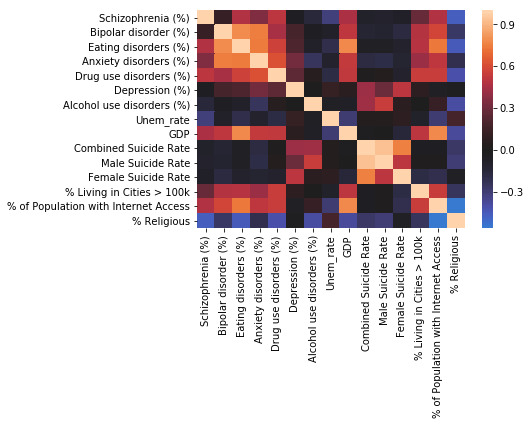

In [38]:
import seaborn as sns
sns.heatmap(final_table.corr(), center = 0)

##### Drop "Bipoar Disorder" since it has corelation with 3 other variables.

In [39]:
final_table.drop("Bipolar disorder (%)", axis = 1, inplace = True)

##### Clean up Some Column Names with too many signs and letters

In [40]:
final_table.rename(columns = {'Schizophrenia (%)': 'Schizophrenia'}, inplace = True)
final_table.rename(columns = {'Eating disorders (%)': 'Eating_disorders'}, inplace = True)
final_table.rename(columns = {'Anxiety disorders (%)': 'Anxiety'}, inplace = True)
final_table.rename(columns = {'Drug use disorders (%)': 'Drug_use'}, inplace = True)
final_table.rename(columns = {'Depression (%)': 'Depression'}, inplace = True)
final_table.rename(columns = {'Alcohol use disorders (%)': 'Alcohol_use'}, inplace = True)
final_table.rename(columns = {'Combined Suicide Rate': 'Combined_suicide_rate'}, inplace = True)
final_table.rename(columns = {'% Living in Cities > 100k': 'urban_population'}, inplace = True)
final_table.rename(columns = {'% of Population with Internet Access': 'Internet_access_percap'}, inplace = True)

In [41]:
final_table

,Code,Schizophrenia,Eating_disorders,Anxiety,Drug_use,Depression,Alcohol_use,Unem_rate,GDP,health_spend_perca,Combined_suicide_rate,Male Suicide Rate,Female Suicide Rate,urban_population,Internet_access_percap,% Religious,Religious
Entity,,,,,,,,,,,,,,,,,
Afghanistan,AFG,0.159494,0.088103,5.023055,1.196912,4.404727,0.612712,23.9,2000,57.2488,6.40000,10.6,2.1,15.56,10.6,97.0,High
Albania,ALB,0.231592,0.113824,3.557997,0.655556,2.450883,1.669982,14.0,12500,271.543,5.60000,7.0,4.3,9.34,66.4,32.5,Low
Algeria,DZA,0.199488,0.181441,5.249815,0.880553,3.946200,0.605362,11.7,15200,260.413,3.30000,4.9,1.8,24.73,42.9,93.0,High
Angola,AGO,0.198776,0.113965,3.272275,0.467204,4.715467,1.456741,6.6,6800,95.2208,8.90000,14.0,4.6,19.97,13.0,88.0,High
Antigua and Barbuda,ATG,0.210017,0.210369,4.316763,0.719728,3.128054,1.947655,11.0,26300,623.115,0.50000,0.0,0.9,33.07,65.2,50.0,Medium
Argentina,ARG,0.206245,0.256648,6.368157,1.322192,3.839975,1.796492,8.1,20900,955.201,9.10000,15.0,3.5,74.17,70.2,66.0,High
Armenia,ARM,0.221530,0.102840,2.762138,0.705029,3.068547,1.660420,18.9,9500,358.842,5.70000,10.1,2.0,53.58,62.0,72.5,High
Australia,AUS,0.373657,0.399329,6.607629,2.406347,4.949714,1.397416,5.6,50300,5002.36,11.70000,17.4,6.0,71.69,88.2,32.0,Low
Austria,AUT,0.267903,0.531239,5.436622,1.001242,3.482648,1.827873,5.5,49900,4688.28,11.40000,17.5,5.7,37.26,84.3,55.0,Medium
